#### imports etc

In [68]:
import pandas as pd
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the csv file for analysis
df = pd.read_csv('london_rent.csv')
df.head()

,price,type,address,url,postcode,number_bedrooms,search_date
0,3012.0,2 bedroom flat,"Horsley Court, Montaigne Close, London",/property-to-rent/property-44782458.html,NaN,2.0,11/10/2016
1,1100.0,1 bedroom flat,"Beaconsfield Road, London",/property-to-rent/property-44818353.html,NaN,1.0,11/10/2016
2,1450.0,2 bedroom flat,"Gaumont House, Marmont Road, London",/property-to-rent/property-44818389.html,NaN,2.0,11/10/2016
3,1257.0,3 bedroom flat,"Lady Hamilton Court, Holders Hill Avenue, Lo...",/property-to-rent/property-44818368.html,NaN,3.0,11/10/2016
4,1300.0,1 bedroom flat,"Elm Park, London, SW2",/property-to-rent/property-56484454.html,SW2,1.0,11/10/2016


## Analysis

In [69]:
# Quick look at the shape of the data.
df.describe()

,price,number_bedrooms
count,4968.000000,4938.000000
mean,2394.276369,1.924868
std,1911.129822,1.121821
min,390.000000,0.000000
25%,1452.000000,1.000000
50%,1863.000000,2.000000
75%,2600.000000,2.000000
max,30333.000000,8.000000


In [70]:
# See which 'types' don't have bedroom number extracted
df[df.number_bedrooms.isnull()].type.unique()

array(['Flat share', 'Detached house', 'Property', 'Town house', 'House',
       'Terraced house'], dtype=object)

In [71]:
# Create a data frame with summary statistics by number of bedrooms.
df_by_bedroom = pd.DataFrame(columns = ['number_bedrooms','count','average_price'])
df_by_bedroom['number_bedrooms'] = df.number_bedrooms[df.number_bedrooms.notnull()].unique().astype(int)
df_by_bedroom.sort_values(by='number_bedrooms',inplace=True)
df_by_bedroom.reset_index(drop=True,inplace=True)
for i in range(0,len(df_by_bedroom.index),1):
    df_by_bedroom['count'].loc[i]=df[df.number_bedrooms==i].number_bedrooms.count()
    df_by_bedroom['average_price'].loc[i]=df[df.number_bedrooms==i].price.mean()

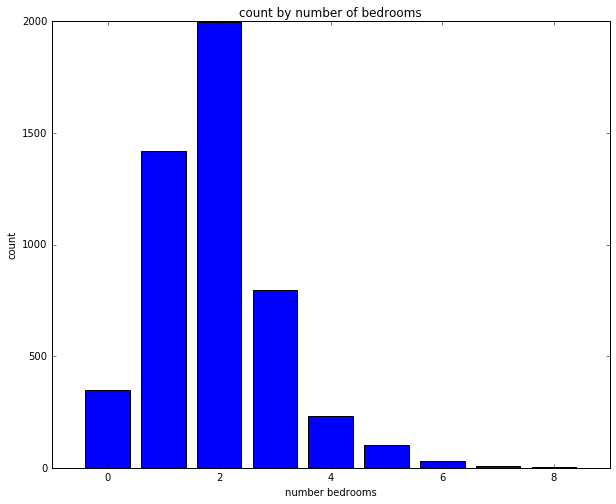

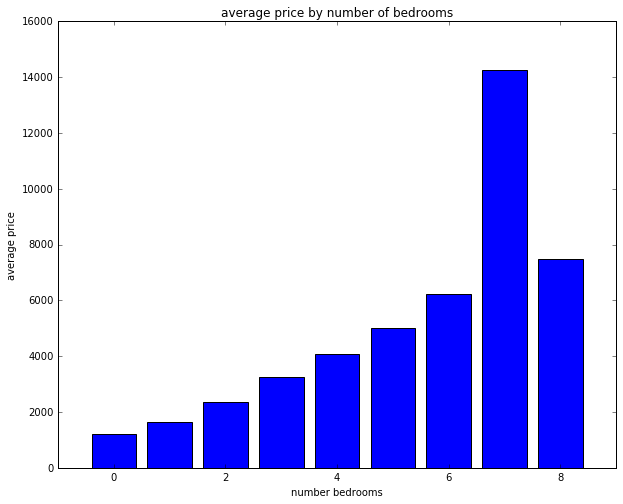

In [72]:
# Plots to visualise results by number of bedrooms.
plt.figure(num=1,figsize=(10,8))
plt.bar(df_by_bedroom['number_bedrooms'],df_by_bedroom['count'],align='center')
plt.xlabel('number bedrooms')
plt.ylabel('count')
plt.title('count by number of bedrooms')
plt.ticklabel_format(style='plain')

plt.figure(num=2,figsize=(10,8))
plt.bar(df_by_bedroom['number_bedrooms'],df_by_bedroom['average_price'],align='center')
plt.xlabel('number bedrooms')
plt.ylabel('average price')
plt.title('average price by number of bedrooms')
plt.ticklabel_format(style='plain')
plt.show()

## Using the postcode csv to find the property borough

In [73]:
# Read in the csv
london_postcodes_df = pd.read_csv('london_postcodes.csv')

In [74]:
# Tidy up column names
def Replace_Bad_Characters_in_Cols(df):
    to_replace = (" ",")","(",":","/","%","-")
    for i in to_replace:
        df.columns = df.columns.str.replace(i, "_")
Replace_Bad_Characters_in_Cols(london_postcodes_df)
london_postcodes_df.head()

,Postcode,District,Built_up_sub_division,London_Borough,Inner_Outer
0,BR1 1AA,Bromley London Boro,Bromley,Bromley,Outer
1,BR1 1AB,Bromley London Boro,Bromley,Bromley,Outer
2,BR1 1AE,Bromley London Boro,Bromley,Bromley,Outer
3,BR1 1AX,Bromley London Boro,Bromley,Bromley,Outer
4,BR1 1BA,Bromley London Boro,Bromley,Bromley,Outer


In [75]:
# Create new columns for the stem & end of the postcodes.
postcode_split = london_postcodes_df.Postcode.str.split(' ', expand=True).astype(str)
postcode_split.columns=('pc_stem','pc_end')
pc_df = pd.merge(london_postcodes_df,postcode_split,how='left',left_index=True,right_index=True)
pc_df.head()

,Postcode,District,Built_up_sub_division,London_Borough,Inner_Outer,pc_stem,pc_end
0,BR1 1AA,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AA
1,BR1 1AB,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AB
2,BR1 1AE,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AE
3,BR1 1AX,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AX
4,BR1 1BA,Bromley London Boro,Bromley,Bromley,Outer,BR1,1BA


In [76]:
# Create a pivot table of the postcode stem by how many full postcodes sit in each borough
pivot = pd.DataFrame(pd.pivot_table(pc_df,values='Postcode',index = 'pc_stem',columns='London_Borough',aggfunc='count'))
pivot.head()

London_Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
pc_stem,,,,,,,,,,,,,,,,,,,,,
BR1,NaN,NaN,NaN,NaN,1724.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR2,NaN,NaN,NaN,NaN,1383.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR3,NaN,NaN,NaN,NaN,2027.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR4,NaN,NaN,NaN,NaN,557.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR5,NaN,NaN,NaN,NaN,1292.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately many postcode stems have full postcodes in more than one borough; e.g. N1 has postcodes in both Islington and Hackney. We'll just default to whichever borough has the greatest number of postcodes for each postcode stem.

In [77]:
# Create dataframe of postcode stems & boroughs
pc_borough_lookup = pd.DataFrame(pivot.idxmax(axis=1))
pc_borough_lookup.reset_index( inplace=True)

# Merge borough column into main df
df = pd.merge(df,pc_borough_lookup,how='left',left_on='postcode',right_on='pc_stem')
df = df.rename(columns={0:'London_Borough'})


In [78]:
i_o_df = pd.DataFrame(pd.pivot_table(pc_df,values='Postcode',index ='London_Borough',columns='Inner_Outer',aggfunc='count'))
i_o_df.Inner = i_o_df.Inner/i_o_df.Inner # change to 1s
i_o_df.Outer = i_o_df.Outer/i_o_df.Outer # change to 1s
i_o_df.rename(columns={'Inner_Outer':'London_Borough'},inplace=True)
i_o_lookup = pd.DataFrame(i_o_df.idxmax(axis=1)) # Create lookup table of borough - inner/outer
i_o_lookup.rename(columns={0:'Inner_Outer'},inplace=True)
i_o_lookup.reset_index(inplace=True)
df = pd.merge(df,i_o_lookup,how='left',on='London_Borough')

In [81]:
df.head()

,price,type,address,url,postcode,number_bedrooms,search_date,pc_stem,London_Borough,Inner_Outer
0,3012.0,2 bedroom flat,"Horsley Court, Montaigne Close, London",/property-to-rent/property-44782458.html,NaN,2.0,11/10/2016,NaN,NaN,NaN
1,1100.0,1 bedroom flat,"Beaconsfield Road, London",/property-to-rent/property-44818353.html,NaN,1.0,11/10/2016,NaN,NaN,NaN
2,1450.0,2 bedroom flat,"Gaumont House, Marmont Road, London",/property-to-rent/property-44818389.html,NaN,2.0,11/10/2016,NaN,NaN,NaN
3,1257.0,3 bedroom flat,"Lady Hamilton Court, Holders Hill Avenue, Lo...",/property-to-rent/property-44818368.html,NaN,3.0,11/10/2016,NaN,NaN,NaN
4,1300.0,1 bedroom flat,"Elm Park, London, SW2",/property-to-rent/property-56484454.html,SW2,1.0,11/10/2016,SW2,Lambeth,Inner


In [106]:
print 'number of records in full dataframe: ',len(df)
print 'number of records with borough data: ',len(df[df.London_Borough.notnull()])

number of records in full dataframe:  4971
number of records with borough data:  3639


#### Focus on 1 beds by borough

In [89]:
df_1beds = df[ (df['London_Borough'].notnull()) & (df['number_bedrooms']==1.0)]
borough_pivot = pd.pivot_table(data=df_1beds,values='price',index='London_Borough',aggfunc=('count','mean'))
borough_pivot.sort_values(by='mean',inplace=True,ascending=False)
borough_pivot.rename(columns={'count':'number of property listings','mean':'mean price'},inplace=True)
borough_pivot.reset_index(inplace=True)
one_beds = pd.merge(borough_pivot,i_o_lookup,how='left',on='London_Borough')
one_beds

,London_Borough,number of property listings,mean price,Inner_Outer
0,Kensington and Chelsea,85,2345.611765,Inner
1,Westminster,152,2249.532895,Inner
2,City of London,4,2118.250000,Inner
3,Camden,68,1755.235294,Inner
4,Islington,79,1700.759494,Inner
5,Southwark,59,1677.881356,Inner
6,Hammersmith and Fulham,36,1644.666667,Inner
7,Hackney,18,1576.277778,Inner
8,Tower Hamlets,135,1570.696296,Inner
9,Hounslow,7,1502.428571,Outer


We can now easily see the cheapest inner London borough to rent!

In [105]:
last_inner_row=len(one_beds[(one_beds['Inner_Outer']=='Inner')])
one_beds[(one_beds['Inner_Outer']=='Inner')][last_inner_row-1:]

,London_Borough,number of property listings,mean price,Inner_Outer
20,Lewisham,27,1132.666667,Inner
